In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_area = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_area.csv")
df_egen = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_egen.csv")
df_medin = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_medin.csv")
df_policies = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_policies.csv")
df_pres = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_pres.csv")
df_sen = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_sen.csv")
df_eusage = pd.read_csv("/content/drive/MyDrive/DSE6311/Cleaned_Datasets/df_eusage.csv")

In [ ]:
df_merged = df_area.merge(df_egen, left_on=['Year', 'State'], right_on=['YEAR', 'STATE'])
df_merged = df_merged.merge(df_medin, on=['Year', 'State'])
df_merged = df_merged.merge(df_pres, on=['Year', 'State'])
df_merged = df_merged.merge(df_sen, on=['Year', 'State'])
df_merged = df_merged.merge(df_eusage, on=['Year', 'State'])

# Drop redundant columns from df_egen
df_merged = df_merged.drop(columns=['YEAR', 'STATE'])

display(df_merged.head())

,Year,State,Total_SqMi,Non-Renewable,Renewable_x,Total_x,Income,Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil,Renewable_y,Total_y,fossil_share
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,0.0,0.0,0.0,3497341.0,10891.0,3508232.0,0.996896
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,311441.0,36200.0,138149.0,7080909.5,447791.0,7528700.5,0.940522
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,2087444.0,748709.0,1335104.0,3655354.1,186069.0,3841423.1,0.951562
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,1397076.0,400602.0,1108196.0,4601548.0,91734.0,4693282.0,0.980454
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,10623608.0,5932522.0,3886853.0,27152255.5,748031.0,27900286.5,0.973189


In [ ]:
df_merged = df_merged.rename({'Total_SqMi': 'Area (SqMi)',
                            'Non-Renewable': 'Non-Renewable Generation (MWh)',
                            'Renewable_x': 'Renewable Generation (MWh)',
                            'Total_x': 'Total Generation (MWh)',
                            'Income': 'Median Income ($)',
                            'Fossil': 'Fossil Energy Consumption (BTU)',
                            'Renewable_y': 'Renewable Energy Consumption (BTU)',
                            'Total_y': 'Total Energy Consumption (BTU)'
                            }, axis = 'columns')
df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,0.0,0.0,0.0,3497341.0,10891.0,3508232.0,0.996896
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,311441.0,36200.0,138149.0,7080909.5,447791.0,7528700.5,0.940522
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,2087444.0,748709.0,1335104.0,3655354.1,186069.0,3841423.1,0.951562
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,1397076.0,400602.0,1108196.0,4601548.0,91734.0,4693282.0,0.980454
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,10623608.0,5932522.0,3886853.0,27152255.5,748031.0,27900286.5,0.973189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,320467.0,178573.0,95369.0,272624.0,192243.0,74663.0,462690.7,60982.7,523673.4,0.883548
1004,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,3317019.0,1742718.0,1221747.0,3086168.0,1803364.0,1282804.0,5824940.5,741578.8,6566519.3,0.887067
1005,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,2976150.0,1382536.0,1405284.0,2657841.0,1472914.0,1184885.0,5912439.1,237517.0,6149956.1,0.961379
1006,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,713051.0,188794.0,489371.0,582911.0,288808.0,269872.0,4008345.7,49641.1,4057986.8,0.987767


In [ ]:
duplicate_entries = df_merged[df_merged.duplicated(subset=['State', 'Year'], keep=False)]
display(duplicate_entries)

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share
409,2008,GA,"59,425",131246808.0,4926588.0,136173395.0,55025,3924486.0,1844123.0,2048759.0,2137956.0,909923.0,1228033.0,9095668.4,312815.0,9408483.4,0.966752
410,2008,GA,"59,425",131246808.0,4926588.0,136173395.0,55025,3924486.0,1844123.0,2048759.0,3752485.0,1757393.0,1867097.0,9095668.4,312815.0,9408483.4,0.966752
425,2008,MS,"48,432",46814385.0,1391326.0,48205711.0,43383,1289865.0,554662.0,724597.0,1243473.0,213000.0,683409.0,4008817.4,94552.0,4103369.4,0.976957
426,2008,MS,"48,432",46814385.0,1391326.0,48205711.0,43383,1289865.0,554662.0,724597.0,1247026.0,480915.0,766111.0,4008817.4,94552.0,4103369.4,0.976957
451,2008,WY,"97,813",44702631.0,1797817.0,46500448.0,63488,254904.0,82868.0,164958.0,249619.0,66202.0,183063.0,3159885.1,19785.9,3179671.0,0.993777
452,2008,WY,"97,813",44702631.0,1797817.0,46500448.0,63488,254904.0,82868.0,164958.0,250007.0,60631.0,189046.0,3159885.1,19785.9,3179671.0,0.993777
536,2010,NY,"54,555",106675408.0,30286245.0,136961654.0,58497,7722019.0,4645332.0,2418323.0,4757635.0,2837684.0,1338308.0,12922025.7,350472.8,13272498.5,0.973594
537,2010,NY,"54,555",106675408.0,30286245.0,136961654.0,58497,7722019.0,4645332.0,2418323.0,4763899.0,3047880.0,1239605.0,12922025.7,350472.8,13272498.5,0.973594
739,2014,OK,"69,899",56451843.0,13703662.0,70155504.0,51020,1334872.0,443547.0,891325.0,820733.0,234307.0,558166.0,6440970.0,159077.7,6600047.7,0.975897
740,2014,OK,"69,899",56451843.0,13703662.0,70155504.0,51020,1334872.0,443547.0,891325.0,820890.0,237923.0,557002.0,6440970.0,159077.7,6600047.7,0.975897


In [ ]:
df_merged = df_merged.drop_duplicates(subset=['State', 'Year'], keep='first').reset_index(drop=True)
df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,0.0,0.0,0.0,3497341.0,10891.0,3508232.0,0.996896
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,311441.0,36200.0,138149.0,7080909.5,447791.0,7528700.5,0.940522
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,2087444.0,748709.0,1335104.0,3655354.1,186069.0,3841423.1,0.951562
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,1397076.0,400602.0,1108196.0,4601548.0,91734.0,4693282.0,0.980454
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,10623608.0,5932522.0,3886853.0,27152255.5,748031.0,27900286.5,0.973189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,320467.0,178573.0,95369.0,272624.0,192243.0,74663.0,462690.7,60982.7,523673.4,0.883548
996,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,3317019.0,1742718.0,1221747.0,3086168.0,1803364.0,1282804.0,5824940.5,741578.8,6566519.3,0.887067
997,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,2976150.0,1382536.0,1405284.0,2657841.0,1472914.0,1184885.0,5912439.1,237517.0,6149956.1,0.961379
998,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,713051.0,188794.0,489371.0,582911.0,288808.0,269872.0,4008345.7,49641.1,4057986.8,0.987767


In [ ]:
df_merged = df_merged.merge(df_policies, left_on=['Year', 'State'], right_on=['Created_Year', 'State'], how='left')

# Drop the redundant 'Created_Year' column
df_merged = df_merged.drop(columns=['Created_Year'])

# Fill NaN values created by the merge with 0
df_merged = df_merged.fillna(0)

df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,...,Public_Benefits_Fund,Rebate_Program,Renewables_Portfolio_Standard,Sales_Tax_Incentive,Solar/Wind_Access_Policy,Solar/Wind_Contractor_Licensing,Solar/Wind_Permitting_Standards,Solar_Renewable_Energy_Credit_Program,Utility_Rate_Discount,Value_of_Solar_Tariff
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,...,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,320467.0,178573.0,95369.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,3317019.0,1742718.0,1221747.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,2976150.0,1382536.0,1405284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,713051.0,188794.0,489371.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
zero_columns = df_merged.columns[(df_merged == 0).all()]

print("Columns with all zeros:")
for col in zero_columns:
    print(col)

Columns with all zeros:


In [ ]:
df_merged = df_merged.drop(columns=zero_columns)
print("Columns with all zeros have been removed.")
display(df_merged.head())

Columns with all zeros have been removed.


,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,...,Public_Benefits_Fund,Rebate_Program,Renewables_Portfolio_Standard,Sales_Tax_Incentive,Solar/Wind_Access_Policy,Solar/Wind_Contractor_Licensing,Solar/Wind_Permitting_Standards,Solar_Renewable_Energy_Credit_Program,Utility_Rate_Discount,Value_of_Solar_Tariff
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,...,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_merged.columns

Index(['Year', 'State', 'Area (SqMi)', 'Non-Renewable Generation (MWh)',
       'Renewable Generation (MWh)', 'Total Generation (MWh)',
       'Median Income ($)', 'Total_Pres_Votes', 'Dem_Pres_Votes',
       'Rep_Pres_Votes', 'Total_Sen_Votes', 'Dem_Sen_Votes', 'Rep_Sen_Votes',
       'Fossil Energy Consumption (BTU)', 'Renewable Energy Consumption (BTU)',
       'Total Energy Consumption (BTU)', 'fossil_share',
       'Appliance/Equipment_Efficiency_Standards', 'Bond_Program',
       'Building_Energy_Code', 'Corporate_Tax_Credit',
       'Corporate_Tax_Deduction', 'Corporate_Tax_Exemption',
       'Energy_Efficiency_Resource_Standard',
       'Energy_Standards_for_Public_Buildings', 'Equipment_Certification',
       'Feed-in_Tariff', 'Generation_Disclosure', 'Grant_Program',
       'Green_Building_Incentive', 'Green_Power_Purchasing',
       'Industry_Recruitment/Support', 'Interconnection', 'Leasing_Program',
       'Line_Extension_Analysis', 'Loan_Program',
       'Mandatory_Utilit

In [ ]:
# Identify policy columns
policy_columns = [col for col in df_merged.columns if col not in ['Year', 'State', 'Area (SqMi)',
                                                                 'Non-Renewable Generation (MWh)', 'Renewable Generation (MWh)',
                                                                 'Total Generation (MWh)', 'Median Income ($)', 'Total_Pres_Votes',
                                                                 'Dem_Pres_Votes', 'Rep_Pres_Votes', 'Total_Sen_Votes', 'Dem_Sen_Votes',
                                                                 'Rep_Sen_Votes', 'Fossil Energy Consumption (BTU)',
                                                                 'Renewable Energy Consumption (BTU)', 'Total Energy Consumption (BTU)',
                                                                 'fossil_share', 'delta_fossil_share_x', 'delta_fossil_share_y',
                                                                 'delta_fossil_share', 'Y_OUTCOME']]

# Sum the policy columns to create a new 'Total_Policies' column
df_merged['Total_Policies'] = df_merged[policy_columns].sum(axis=1)

# Drop the individual policy columns
df_merged = df_merged.drop(columns=policy_columns)

display(df_merged.head())

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,0.0,0.0,0.0,3497341.0,10891.0,3508232.0,0.996896,2.0
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,311441.0,36200.0,138149.0,7080909.5,447791.0,7528700.5,0.940522,1.0
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,2087444.0,748709.0,1335104.0,3655354.1,186069.0,3841423.1,0.951562,0.0
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,1397076.0,400602.0,1108196.0,4601548.0,91734.0,4693282.0,0.980454,7.0
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,10623608.0,5932522.0,3886853.0,27152255.5,748031.0,27900286.5,0.973189,10.0


In [ ]:
df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Total_Pres_Votes,Dem_Pres_Votes,Rep_Pres_Votes,Total_Sen_Votes,Dem_Sen_Votes,Rep_Sen_Votes,Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,285560.0,79004.0,167398.0,0.0,0.0,0.0,3497341.0,10891.0,3508232.0,0.996896,2.0
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,1666272.0,692611.0,941173.0,311441.0,36200.0,138149.0,7080909.5,447791.0,7528700.5,0.940522,1.0
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,921781.0,422768.0,472940.0,2087444.0,748709.0,1335104.0,3655354.1,186069.0,3841423.1,0.951562,0.0
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,1532016.0,685341.0,781652.0,1397076.0,400602.0,1108196.0,4601548.0,91734.0,4693282.0,0.980454,7.0
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,10965822.0,5861203.0,4567429.0,10623608.0,5932522.0,3886853.0,27152255.5,748031.0,27900286.5,0.973189,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,320467.0,178573.0,95369.0,272624.0,192243.0,74663.0,462690.7,60982.7,523673.4,0.883548,2.0
996,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,3317019.0,1742718.0,1221747.0,3086168.0,1803364.0,1282804.0,5824940.5,741578.8,6566519.3,0.887067,0.0
997,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,2976150.0,1382536.0,1405284.0,2657841.0,1472914.0,1184885.0,5912439.1,237517.0,6149956.1,0.961379,1.0
998,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,713051.0,188794.0,489371.0,582911.0,288808.0,269872.0,4008345.7,49641.1,4057986.8,0.987767,0.0


In [ ]:
# Calculate percentage of votes for President
df_merged['Dem_Pres_Percent'] = (df_merged['Dem_Pres_Votes'] / df_merged['Total_Pres_Votes']) * 100
df_merged['Rep_Pres_Percent'] = (df_merged['Rep_Pres_Votes'] / df_merged['Total_Pres_Votes']) * 100

# Calculate percentage of votes for Senate
df_merged['Dem_Sen_Percent'] = (df_merged['Dem_Sen_Votes'] / df_merged['Total_Sen_Votes']) * 100
df_merged['Rep_Sen_Percent'] = (df_merged['Rep_Sen_Votes'] / df_merged['Total_Sen_Votes']) * 100

# Drop the original total and individual vote count columns
df_merged = df_merged.drop(columns=['Total_Pres_Votes', 'Dem_Pres_Votes', 'Rep_Pres_Votes',
                                    'Total_Sen_Votes', 'Dem_Sen_Votes', 'Rep_Sen_Votes'])

display(df_merged.head())

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies,Dem_Pres_Percent,Rep_Pres_Percent,Dem_Sen_Percent,Rep_Sen_Percent
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,3497341.0,10891.0,3508232.0,0.996896,2.0,27.666340,58.620955,NaN,NaN
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,7080909.5,447791.0,7528700.5,0.940522,1.0,41.566503,56.483755,11.623389,44.358000
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,3655354.1,186069.0,3841423.1,0.951562,0.0,45.864256,51.307198,35.867262,63.958794
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,4601548.0,91734.0,4693282.0,0.980454,7.0,44.734585,51.021138,28.674317,79.322528
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,27152255.5,748031.0,27900286.5,0.973189,10.0,53.449737,41.651497,55.842817,36.586939


In [ ]:
df_merged = df_merged.fillna(0)

In [ ]:
df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies,Dem_Pres_Percent,Rep_Pres_Percent,Dem_Sen_Percent,Rep_Sen_Percent
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,3497341.0,10891.0,3508232.0,0.996896,2.0,27.666340,58.620955,0.000000,0.000000
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,7080909.5,447791.0,7528700.5,0.940522,1.0,41.566503,56.483755,11.623389,44.358000
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,3655354.1,186069.0,3841423.1,0.951562,0.0,45.864256,51.307198,35.867262,63.958794
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,4601548.0,91734.0,4693282.0,0.980454,7.0,44.734585,51.021138,28.674317,79.322528
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,27152255.5,748031.0,27900286.5,0.973189,10.0,53.449737,41.651497,55.842817,36.586939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,462690.7,60982.7,523673.4,0.883548,2.0,55.722742,29.759382,70.515802,27.386804
996,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,5824940.5,741578.8,6566519.3,0.887067,0.0,52.538680,36.832680,58.433760,41.566240
997,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,5912439.1,237517.0,6149956.1,0.961379,1.0,46.453841,47.218185,55.417687,44.580733
998,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,4008345.7,49641.1,4057986.8,0.987767,0.0,26.476928,68.630575,49.545814,46.297291


In [ ]:
# === Compare fossil share in 2000 vs 2019 ===
df_2000 = df_merged[df_merged["Year"] == 2000][["State", "fossil_share"]].rename(columns={"fossil_share": "fossil_share_2000"})
df_2019 = df_merged[df_merged["Year"] == 2019][["State", "fossil_share"]].rename(columns={"fossil_share": "fossil_share_2019"})
merged = pd.merge(df_2000, df_2019, on="State")

In [ ]:
merged

,State,fossil_share_2000,fossil_share_2019
0,AK,0.996896,0.990457
1,AL,0.940522,0.938843
2,AR,0.951562,0.953777
3,AZ,0.980454,0.975013
4,CA,0.973189,0.958252
5,CO,0.992738,0.975435
6,CT,0.967748,0.977812
7,DE,0.995219,0.993608
8,FL,0.968745,0.970516
9,GA,0.957372,0.950246


In [ ]:
# === Compute change in fossil share and label success ===
merged["delta_fossil_share"] = merged["fossil_share_2000"] - merged["fossil_share_2019"]
median_delta = merged["delta_fossil_share"].median()
merged["Y_OUTCOME"] = (merged["delta_fossil_share"] > median_delta).astype(int)

merged

,State,fossil_share_2000,fossil_share_2019,delta_fossil_share,Y_OUTCOME
0,AK,0.996896,0.990457,0.006439,0
1,AL,0.940522,0.938843,0.001679,0
2,AR,0.951562,0.953777,-0.002215,0
3,AZ,0.980454,0.975013,0.005441,0
4,CA,0.973189,0.958252,0.014937,1
5,CO,0.992738,0.975435,0.017303,1
6,CT,0.967748,0.977812,-0.010064,0
7,DE,0.995219,0.993608,0.001611,0
8,FL,0.968745,0.970516,-0.001771,0
9,GA,0.957372,0.950246,0.007126,0


In [ ]:
df_merged = df_merged.merge(merged[['State', 'fossil_share_2000', 'fossil_share_2019', 'Y_OUTCOME']], on='State', how='left')
df_merged

,Year,State,Area (SqMi),Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies,Dem_Pres_Percent,Rep_Pres_Percent,Dem_Sen_Percent,Rep_Sen_Percent,fossil_share_2000,fossil_share_2019,Y_OUTCOME
0,2000,AK,"665,384",5154706.0,1001819.0,6156525.0,78675,3497341.0,10891.0,3508232.0,0.996896,2.0,27.666340,58.620955,0.000000,0.000000,0.996896,0.990457,0
1,2000,AL,"52,420",114511544.0,9893796.0,124405340.0,52737,7080909.5,447791.0,7528700.5,0.940522,1.0,41.566503,56.483755,11.623389,44.358000,0.940522,0.938843,0
2,2000,AR,"53,179",39911247.0,3964519.0,43875766.0,44211,3655354.1,186069.0,3841423.1,0.951562,0.0,45.864256,51.307198,35.867262,63.958794,0.951562,0.953777,0
3,2000,AZ,"113,990",80587778.0,8358799.0,88946577.0,59226,4601548.0,91734.0,4693282.0,0.980454,7.0,44.734585,51.021138,28.674317,79.322528,0.980454,0.975013,0
4,2000,CA,"163,695",147245036.0,60837447.0,208082483.0,69696,27152255.5,748031.0,27900286.5,0.973189,10.0,53.449737,41.651497,55.842817,36.586939,0.973189,0.958252,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,VT,"9,616",1913.0,2287885.0,2289798.0,74305,462690.7,60982.7,523673.4,0.883548,2.0,55.722742,29.759382,70.515802,27.386804,0.949012,0.883548,1
996,2019,WA,"71,298",32182057.0,74281552.0,106463608.0,82454,5824940.5,741578.8,6566519.3,0.887067,0.0,52.538680,36.832680,58.433760,41.566240,0.889395,0.887067,0
997,2019,WI,"65,496",56885038.0,5889260.0,62774299.0,67355,5912439.1,237517.0,6149956.1,0.961379,1.0,46.453841,47.218185,55.417687,44.580733,0.968496,0.961379,0
998,2019,WV,"24,230",60588530.0,3337109.0,63925639.0,53706,4008345.7,49641.1,4057986.8,0.987767,0.0,26.476928,68.630575,49.545814,46.297291,0.995706,0.987767,0


In [ ]:
# Export to CSV (save to Google Drive)
df_merged.to_csv('/content/drive/My Drive/capstone_data_cleaned/df_merged.csv', index=False)

In [ ]:
df_merged.corr(numeric_only=True).round(2)

,Year,Non-Renewable Generation (MWh),Renewable Generation (MWh),Total Generation (MWh),Median Income ($),Fossil Energy Consumption (BTU),Renewable Energy Consumption (BTU),Total Energy Consumption (BTU),fossil_share,Total_Policies,Dem_Pres_Percent,Rep_Pres_Percent,Dem_Sen_Percent,Rep_Sen_Percent,fossil_share_2000,fossil_share_2019,Y_OUTCOME
Year,1.00,-0.01,0.15,0.02,0.10,-0.01,0.14,-0.01,-0.15,-0.14,-0.01,-0.08,-0.06,-0.04,-0.00,0.00,-0.00
Non-Renewable Generation (MWh),-0.01,1.00,0.16,0.98,-0.23,0.89,0.41,0.89,0.28,0.16,-0.01,0.09,-0.02,0.07,0.27,0.32,-0.06
Renewable Generation (MWh),0.15,0.16,1.00,0.37,0.10,0.36,0.84,0.38,-0.44,0.17,0.15,-0.20,0.10,-0.08,-0.39,-0.36,0.07
Total Generation (MWh),0.02,0.98,0.37,1.00,-0.19,0.92,0.57,0.92,0.17,0.19,0.02,0.04,0.01,0.05,0.17,0.23,-0.04
Median Income ($),0.10,-0.23,0.10,-0.19,1.00,-0.09,-0.06,-0.09,0.04,0.07,0.36,-0.46,0.18,-0.30,0.06,0.06,-0.16
Fossil Energy Consumption (BTU),-0.01,0.89,0.36,0.92,-0.09,1.00,0.50,1.00,0.23,0.20,0.04,0.00,0.03,0.01,0.23,0.27,0.03
Renewable Energy Consumption (BTU),0.14,0.41,0.84,0.57,-0.06,0.50,1.00,0.52,-0.44,0.17,0.17,-0.17,0.07,-0.03,-0.42,-0.32,-0.06
Total Energy Consumption (BTU),-0.01,0.89,0.38,0.92,-0.09,1.00,0.52,1.00,0.22,0.20,0.04,-0.00,0.03,0.01,0.22,0.26,0.02
fossil_share,-0.15,0.28,-0.44,0.17,0.04,0.23,-0.44,0.22,1.00,0.01,-0.09,0.15,0.10,-0.07,0.95,0.94,-0.11
Total_Policies,-0.14,0.16,0.17,0.19,0.07,0.20,0.17,0.20,0.01,1.00,0.18,-0.13,0.14,-0.11,-0.02,-0.01,0.05


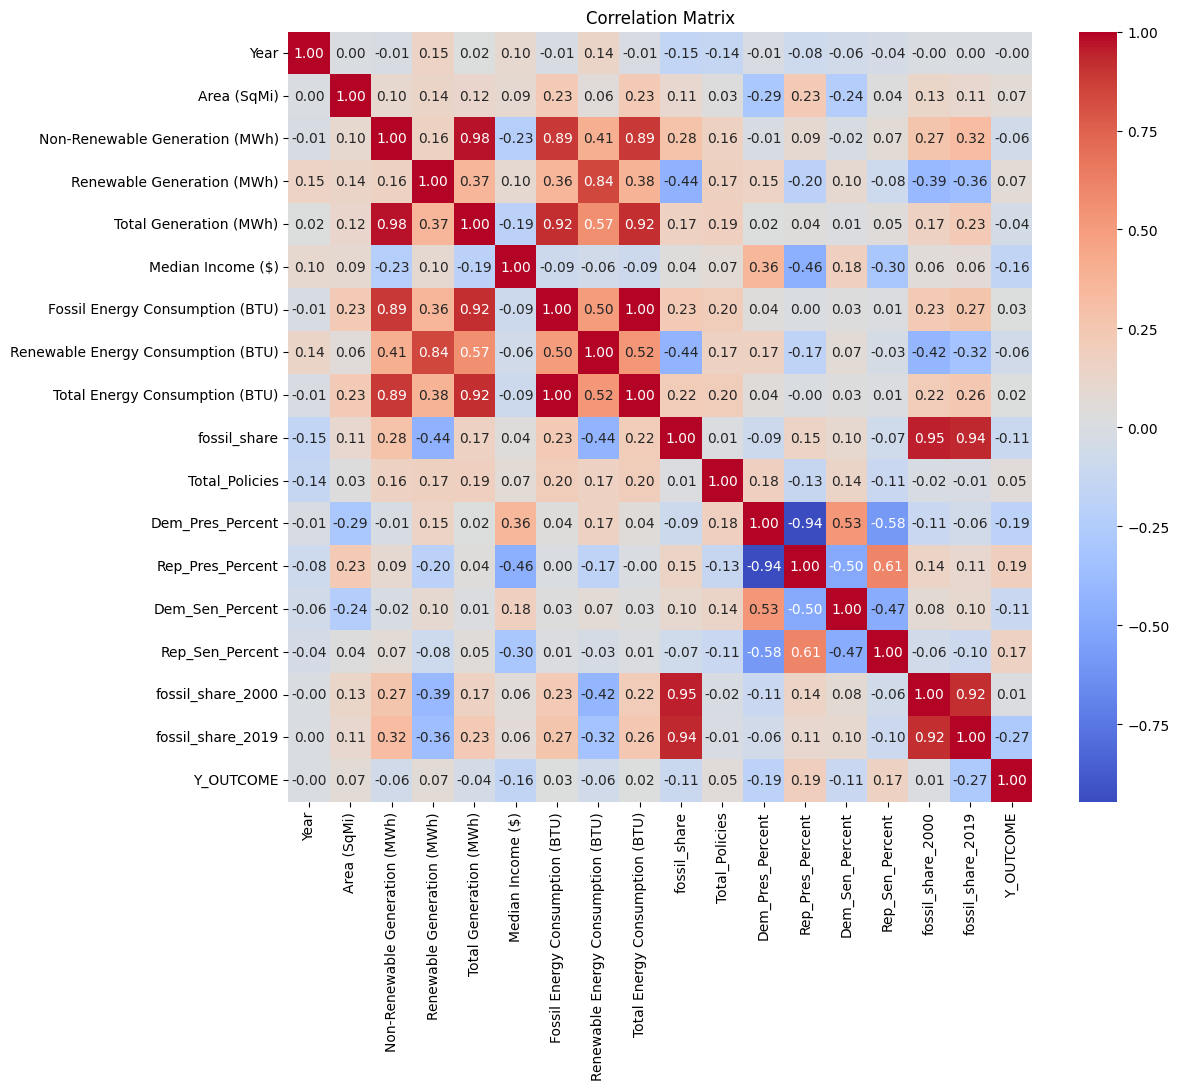

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Area (SqMi)' to numeric by removing commas
df_merged['Area (SqMi)'] = df_merged['Area (SqMi)'].str.replace(',', '').astype(float)

# Calculate the correlation matrix (excluding non-numeric columns)
numeric_df = df_merged.drop(columns=['State'])
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()